# HW3: تشخیص اعداد دست نویس با استفاده از شبکه‌های عصبی پیچشی (CNN)
Welcome to Homework 3  &#128522;&#9996;

In [1]:

import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

In [3]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


 <div dir='rtl'style="text-align: right;font-family:verdana;">
 
## A) دسته‌بندی به کمک شبکه‌های عصبی پیچشی

In [10]:
# Define the CNN model

def cnn_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(10,(3,3),input_shape=(28,28,1),activation='relu',padding='same'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(20,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10,activation='softmax'),
    ])
    return model


model = cnn_model()

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 20)        1820      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 20)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 720)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2346 - accuracy: 0.9316
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0763 - accuracy: 0.9768
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0581 - accuracy: 0.9825
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0481 - accuracy: 0.9853
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0405 - accuracy: 0.9875
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0359 - accuracy: 0.9885
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0324 - accuracy: 0.9899
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0288 - accuracy: 0.9907
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0251 - accuracy: 0.9923
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.023

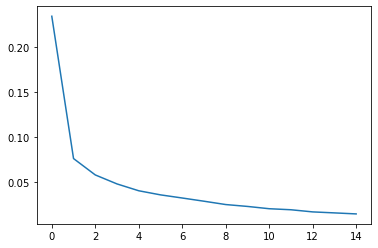

In [5]:
# Train and test the CNN model
Y_train = tf.keras.utils.to_categorical(train_labels)

history = model.fit(train_images,Y_train,epochs=15)

plt.plot(history.history['loss'])


In [6]:
#  Use the evaluate method to test the model
Y_test = tf.keras.utils.to_categorical(test_labels)
model.evaluate(test_images,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0472 - accuracy: 0.9880


[0.047213513404130936, 0.9879999756813049]

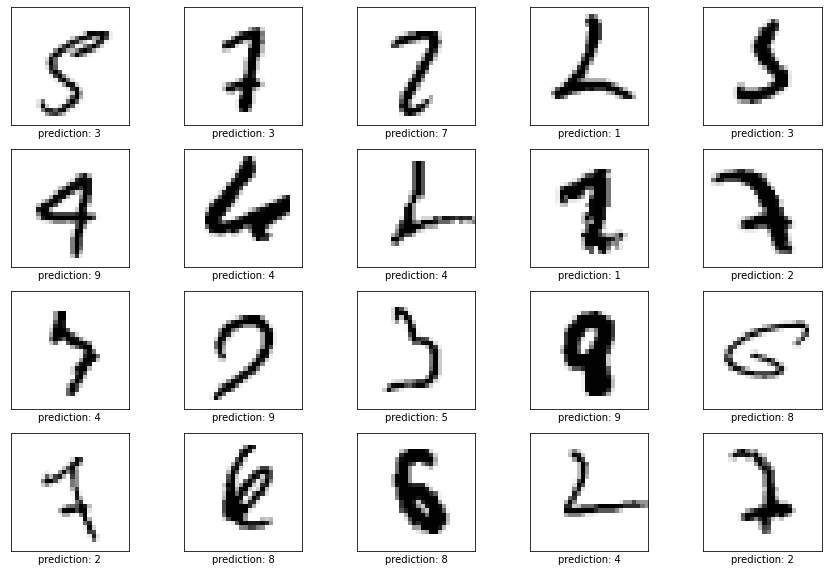

In [7]:
#  Make predictions with the CNN model
wrongs = []
for i,pre in enumerate(model.predict(test_images)):
    ans = tf.argmax(pre)
    if ans != tf.argmax(Y_test[i]):
        wrongs.append([i,ans])

plt.figure(figsize=(15,10))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(test_images[wrongs[i][0]]), cmap=plt.cm.binary)
    plt.xlabel(f'prediction: {wrongs[i][1]}')


    

<div dir='rtl'style="text-align: right;font-family:verdana;">

تصاویری که به غلط توسط مدل تشخیص داده شده‌اند اکثرا تصاویری غیر واضح هستند که تشخصیشان بعضا برای خود انسان نیز دشوار است!

علت خطا میتواند ناشی از همین غیر واضح بودن باشد و در ضمن این اعداد اکثرا به اعدادی که مدل آنها را حدس زده نیز شبیه می‌باشند پس می‌توان این خطاها را بعضا در اکثر موارد ناشی از شباهت با ارقام دیگر نیز دانست

true answer is 7
predicted answer is 7
confident for each digit:
0: 0.000
1: 0.000
2: 0.000
3: 0.000
4: 0.000
5: 0.000
6: 0.000
7: 100.000
8: 0.000
9: 0.000


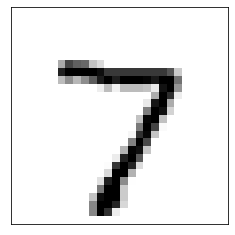

In [8]:
# Please identify the digit with the highest confidence prediction for the first image in the test dataset

plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(test_images[0]), cmap=plt.cm.binary)
print(f"true answer is {test_labels[0]}")
print(f"predicted answer is {tf.argmax(model.predict(test_images)[0])}")
print(f"confident for each digit:")
for i,p in enumerate(model.predict(test_images)[0]):
    print(f"{i}: {p*100:.3f}")


<div dir='rtl'style="text-align: right;font-family:verdana;">

بله مدل توانسته که جواب را به درستی تشخیص دهد و این را نیاز با 
confident
۱۰۰٪
(در این اجرا)
انتخاب کرده است

<div dir='rtl'style="text-align: right;font-family:verdana;">

# سوالات pdf

## 1)
بهترین دقتی که تا این لحظه با چندین بار اجرا بدست آمده روی داده‌های ترین
۹۹.۵٪
و روی داده‌های تست
۹۸.۷٪
بوده است.

## 2)
بله دقت شبکه حدود ۴ درصد نسبت به بهترین مدل تمرین قبلی بهتر شده است.
دلیل آن نیز احتمالا این است که مدل کانوولوشنی دارای دو مزیت است.
اول
parameter sharing
که باعث می‌شود یک فیلتری که روی یک قسمت از تصویر کاربرد دارد رو سایر قسمت‌های تصویر نیز استفاده شود و بتواند ویژگی مورد نظر را هر جایی از تصویر که باشد پیدا کند.
دوم هم
Sparsity of connections
است که باعث می‌شود خروجی هر لایه فقط به قسمت کوچکی از لایه قبلی وابسته باشد که باعث می‌شود با تعداد پارامتر کمتر شبکه‌ای عمیق‌تر و با دقت بیشتر داشت.

## 3)

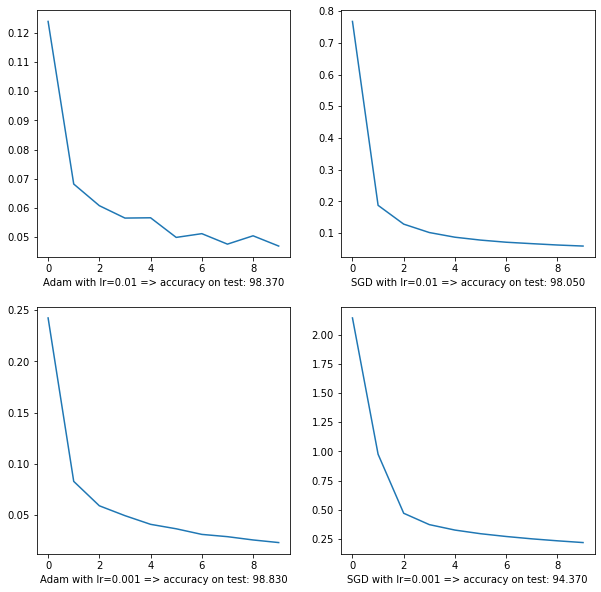

In [11]:
plt.figure(figsize=(10,10))

lrs = [1e-2,1e-3]

models = []

for i,lr in enumerate(lrs):
    models.append(cnn_model())
    models[-1].compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=lr),metrics=['accuracy'])
    history = models[-1].fit(train_images,Y_train,epochs=10,verbose=0)
    test = models[-1].evaluate(test_images,Y_test,verbose=0)
    plt.subplot(len(lrs),2,2*i+1)
    plt.plot(history.history['loss'])
    plt.xlabel(f'Adam with lr={lr} => accuracy on test: {test[1]*100:.3f}')

    models.append(cnn_model())
    models[-1].compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=lr),metrics=['accuracy'])
    history = models[-1].fit(train_images,Y_train,epochs=10,verbose=0)
    test = models[-1].evaluate(test_images,Y_test,verbose=0)
    plt.subplot(len(lrs),2,2*i+2)
    plt.plot(history.history['loss'])
    plt.xlabel(f'SGD with lr={lr} => accuracy on test: {test[1]*100:.3f}')


    


<div dir='rtl'style="text-align: right;font-family:verdana;">

می‌بینیم عملکرد
Adam
برای هر دو
learning rate
تقریبا یکسان است و در هر دو حالت نیز از
SGD
بهتر است. اما عملکرد
SGD
زمانی که نرخ یادگیری کمتر باشد پایین تر است (البته شاید دلیل آن کم بودن تعداد 
epochها
است که باعث می‌شود به نقطه‌ی همگرایی نرسد).